# Read KNMI observations using hydropandas

This notebook introduces how to use the `hydropandas` package to read, process and visualise KNMI data.

## <a id=top></a>Notebook contents

1. [Observation types](#Obs)
2. [Get KNMI data](#reading)
3. [Get ObsCollections](#readingOC)
4. [Precipitation data](#precipitation)

In [1]:
from hydropandas import ObsCollection
from hydropandas.io import io_knmi
from hydropandas.observation import PrecipitationObs, EvaporationObs, MeteoObs
from IPython.display import display

import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

import logging

In [2]:
logging.basicConfig(level=logging.ERROR)

## Observation types<a id=Obs></a>

The hydropandas package has a function to read all kinds of KNMI observations. These are stored in an `Obs` object. There are three types of observations you can obtain from the KNMI:
- `EvaporationObs`, for evaporation time series
- `PrecipitationObs`, for precipitation time series
- `MeteoObs`, for all the other meteorological time series

With the code below we get the Evaporation in [m/day] for KNMI station 344 (Rotterdam Airport).

,EV24
2021-01-01 01:00:00,0.0003
2021-01-02 01:00:00,0.0002
2021-01-03 01:00:00,0.0003
2021-01-04 01:00:00,0.0001
2021-01-05 01:00:00,0.0001


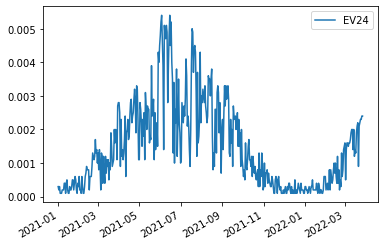

In [3]:
o = EvaporationObs.from_knmi(344)
display(o.head())
o.plot();

,RH
2021-01-01 01:00:00,0.0005
2021-01-02 01:00:00,0.0018
2021-01-03 01:00:00,0.0007
2021-01-04 01:00:00,0.0000
2021-01-05 01:00:00,0.0018


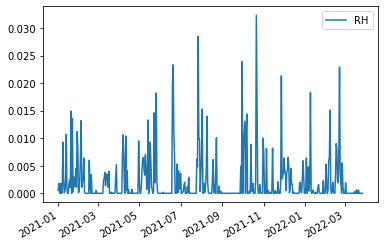

In [4]:
o = PrecipitationObs.from_knmi(344)
display(o.head())
o.plot();

**attributes**

A `MeteoObs` object has the following attributes:

* `name`: station name and variable
* `x`: x-coördinate in m RD
* `y`: y-coördinate in m RD
* `station`: station number
* `meta`: dictionary with other metadata

In [5]:
print(f"name: {o.name}")
print(f"x,y: {(o.x, o.y)}")
print(f"station: {o.station}")
print("metadata:")
for key, item in o.meta.items():
    print(f'    {key}: {item}')

name: RH_ROTTERDAM
x,y: (90598.0, 442813.0)
station: 344
metadata:
    LON_east: {'344': 4.447}
    LAT_north: {'344': 51.962}
    ALT_m: {'344': -4.3}
    NAME: {'344': 'Rotterdam'}
    RH: Etmaalsom van de neerslag (in m) (0 voor <0.05mm) / Daily precipitation amount (in m) (0 for <0.05mm)
    x: 90598.0
    y: 442813.0
    station: 344
    name: RH_ROTTERDAM


## Get KNMI data<a id=reading></a>

There are 2 main method to obtain meteorological data:

1. `from_knmi`
2. `from_nearest_xy`

Below you can see how they can be called to obtain the precipitation data. Notice that they return the same data because station 344 is nearest to the given xy coördinates.

In [6]:
o1 = PrecipitationObs.from_knmi(344)
o2 = PrecipitationObs.from_nearest_xy(90600, 442800)
o1.equals(o2)

True

**read options**

The `MeteoObs.from_knmi` method contains the following keyword arguments:

- `stn`: station number.
- `startdate`: the start date of the time series you want, default is 1st of January 2019.
- `enddate`: the end date of the time series you want, default is today.
- `fill_missing_obs`: option to fill missing values with values from the nearest KNMI station. If measurements are filled an extra column is added to the time series in which the station number is shown that was used to fill a particular missing value.
- `interval`: time interval of the time series, default is 'daily'
- `raise_exception`: option to raise an error when the requested time series is empty.
***

The 3 examples below give a brief summary of these options

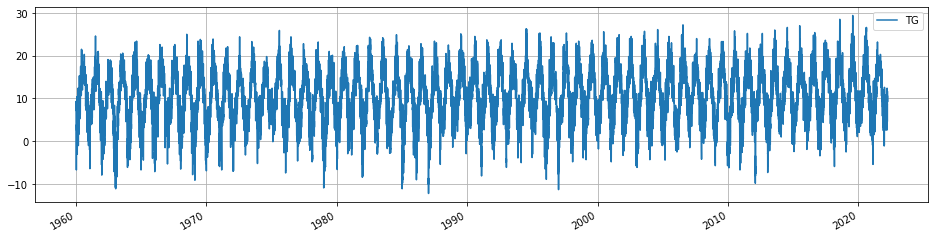

In [7]:
#example 1 get daily average temperature from 1900 till now
o_t = MeteoObs.from_knmi(344, 'TG', startdate='1960')
o_t.plot(figsize=(16,4), grid=True);

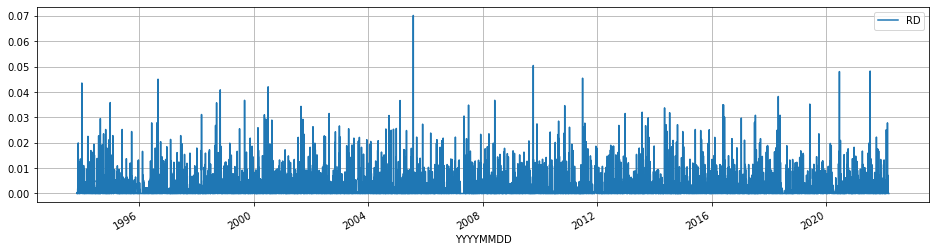

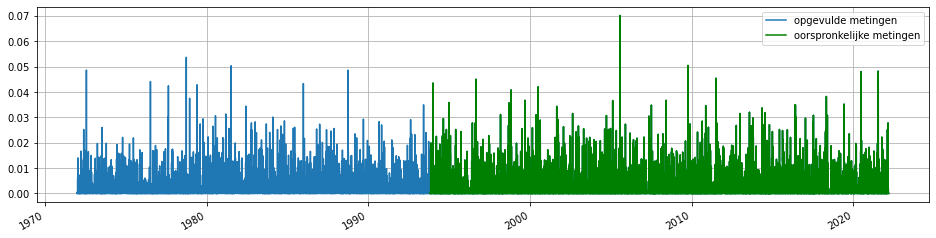

In [8]:
#example 2 get daily average precipitation from 1972 with and without filling missing measurements
o_rd = PrecipitationObs.from_knmi(892, stn_type='precipitation', startdate='1972', fill_missing_obs=False)
o_rd.plot(figsize=(16,4), grid=True)

o_rd_filled = PrecipitationObs.from_knmi(892, stn_type='precipitation', startdate='1972', fill_missing_obs=True)
fig, ax = plt.subplots()
o_rd_filled['RD'].plot(figsize=(16,4), ax=ax, label='opgevulde metingen');
o_rd_filled.loc[o_rd_filled['station_opvulwaarde'].isna(),'RD'].plot(color='green',ax=ax,grid=True,  label='oorspronkelijke metingen');
ax.legend();

In [9]:
#see the station_opvulwaarde
display(o_rd.head())
display(o_rd_filled.head())

,RD
YYYYMMDD,
1993-11-01 09:00:00,0.0000
1993-11-02 09:00:00,0.0000
1993-11-03 09:00:00,0.0005
1993-11-04 09:00:00,0.0000
1993-11-05 09:00:00,0.0000


,RD,station_opvulwaarde
1972-01-01 09:00:00,0.0000,910
1972-01-02 09:00:00,0.0000,910
1972-01-03 09:00:00,0.0000,910
1972-01-04 09:00:00,0.0000,910
1972-01-05 09:00:00,0.0004,910


In [10]:
# example 3 get evaporation and print additional information during download using the logging module
logging.getLogger().getEffectiveLevel()
logging.getLogger().setLevel(logging.INFO)

o_ev = EvaporationObs.from_knmi(344, startdate='1972', fill_missing_obs=True)
o_ev

INFO:hydropandas.io.io_knmi:download knmi EV24 data from station 344-ROTTERDAM between 1972-01-01 00:00:00 and 2022-03-27 20:22:47.646377
INFO:hydropandas.io.io_knmi:station 344 has no measurements before 1987-09-12 01:00:00
INFO:hydropandas.io.io_knmi:station 344 has 5809 missing measurements
INFO:hydropandas.io.io_knmi:trying to fill 5809 measurements with station [210]
INFO:hydropandas.io.io_knmi:download knmi EV24 data from station 210-VALKENBURG between 1972-01-01 00:00:00 and 2022-03-27 20:22:47.646377
INFO:hydropandas.io.io_knmi:trying to fill 5563 measurements with station [330]
INFO:hydropandas.io.io_knmi:download knmi EV24 data from station 330-HOEK-VAN-HOLLAND between 1972-01-01 00:00:00 and 2022-03-27 20:22:47.646377
INFO:hydropandas.io.io_knmi:trying to fill 5563 measurements with station [348]
INFO:hydropandas.io.io_knmi:download knmi EV24 data from station 348-CABAUW between 1972-01-01 00:00:00 and 2022-03-27 20:22:47.646377
INFO:hydropandas.io.io_knmi:trying to fill 549

,EV24,station_opvulwaarde
1972-01-01 01:00:00,0.0002,260
1972-01-02 01:00:00,0.0002,260
1972-01-03 01:00:00,0.0002,260
1972-01-04 01:00:00,0.0000,260
1972-01-05 01:00:00,0.0000,260
...,...,...
2022-03-23 01:00:00,0.0022,NaN
2022-03-24 01:00:00,0.0023,NaN
2022-03-25 01:00:00,0.0023,NaN
2022-03-26 01:00:00,0.0024,NaN


In [11]:
# reset the logging module
logging.getLogger().setLevel(logging.ERROR)

## Get ObsCollections<a id=readingOC></a>

It is also possible to read multiple `Observation` objects at once and store them in an `ObsCollection` object. For this we use the `ObsCollection.from_knmi()` method. Below an example to obtain precipitation (RH) and evaporation (EV24) from the KNMI station of Rotterdam and De Bilt. 

In [12]:
oc = ObsCollection.from_knmi(stns=[344, 260], meteo_vars=['RH', 'EV24'], ObsClass=[PrecipitationObs, EvaporationObs])
oc

,x,y,filename,station,meteo_var,obs
name,,,,,,
RH_ROTTERDAM,90598.000000,442813.000000,,344,RH,-----metadata------ name : RH_ROTTERDAM x : 9...
RH_DE-BILT,141002.996557,456772.017696,,260,RH,-----metadata------ name : RH_DE-BILT x : 141...
EV24_ROTTERDAM,90598.000000,442813.000000,,344,EV24,-----metadata------ name : EV24_ROTTERDAM x :...
EV24_DE-BILT,141002.996557,456772.017696,,260,EV24,-----metadata------ name : EV24_DE-BILT x : 1...


Besides giving a list of stations it is also possible to:
- specify `locations` as a dataframe with x, y coördinates (RD_new), the function will find the nearest KNMI station for every location.
- specify `xmid` and `ymid` which are 2 arrays corresponding to a structured grid to obtain the nearest KNMI station for every cell in the grid.

In [13]:
location = pd.DataFrame(index=['Rotterdam'], data ={'x':77500, 'y':399500})
ObsCollection.from_knmi(locations=location, 
                        meteo_vars=['RH'], ObsClass=[PrecipitationObs])

,x,y,filename,station,meteo_var,obs
name,,,,,,
RH_WOENSDRECHT,82881.403813,384958.510811,,340,RH,-----metadata------ name : RH_WOENSDRECHT x :...


In [14]:
ObsCollection.from_knmi(xmid=np.array([77500]), ymid=np.array([399500]), 
                        meteo_vars=['RH'], ObsClass=[PrecipitationObs])

,x,y,filename,station,meteo_var,obs
name,,,,,,
RH_WOENSDRECHT,82881.403813,384958.510811,,340,RH,-----metadata------ name : RH_WOENSDRECHT x :...


## Precipitation<a id=precipitation></a>

The KNMI database has three different precipitation products:
1. Daily data from a meteorological station
2. Daily data from a neerslag (precipitation) station
3. Hourly data from a meteorological station

All three products can be obtained using the `from_knmi` method. Product 1 and 2 can also be accessed without the api.

If you want to access the data from a neerslag (precipitation) station you should add `stn_type='precipitation'` to the `PrecipitationObs.from_knmi()` method. 

In [15]:
# daily meteo station
precip1 = PrecipitationObs.from_knmi(260, startdate='2010-1-1', enddate='2010-1-10', fill_missing_obs=False)

In [16]:
# daily neerslag station
precip2 = PrecipitationObs.from_knmi(550, stn_type='precipitation', startdate='2010-1-1', enddate='2010-1-10', fill_missing_obs=False)

In [17]:
# hourly meteo station (only works with api)
precip3 = PrecipitationObs.from_knmi(260, startdate='2010-1-1', enddate='2010-1-10', fill_missing_obs=False, interval='hourly')

In [18]:
# daily meteo station without api
precip4 = PrecipitationObs.from_knmi(260, startdate='2010-1-1', enddate='2010-1-10', fill_missing_obs=False, use_api=False)

In [19]:
# daily meteo station without api
precip5 = PrecipitationObs.from_knmi(550, stn_type='precipitation', startdate='2010-1-1', enddate='2010-1-10', fill_missing_obs=False, use_api=False)

Om te laten zien wat de verschillen en overeenkomsten zijn, zijn de neerslaghoeveelheden van de verschillende stations in de figuur hieronder weergegeven.

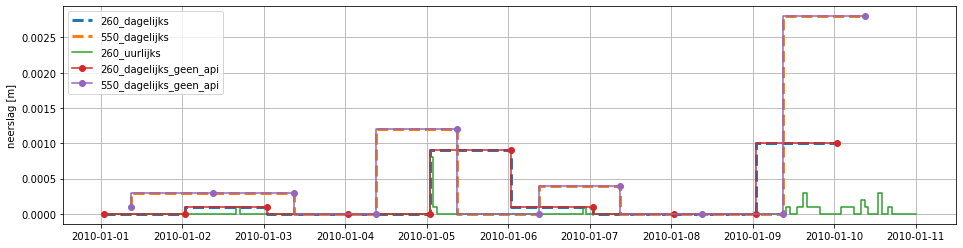

In [20]:
fig, ax = plt.subplots(figsize=(16,4))
ax.step(precip1.index, precip1.values, ls='--', lw=3, label=str(precip1.meta['station']) + '_dagelijks')
ax.step(precip2.index, precip2.values, ls='--', lw=3, label=str(precip2.meta['station']) + '_dagelijks')
ax.step(precip3.index, precip3.values, label=str(precip3.meta['station']) + '_uurlijks')
ax.step(precip4.index, precip4.values, marker='o', label=str(precip4.meta['station']) + '_dagelijks_geen_api')
ax.step(precip5.index, precip5.values, marker='o', label=str(precip5.meta['station']) + '_dagelijks_geen_api')
ax.legend()
ax.grid()
ax.set_ylabel('neerslag [m]');

Tot slot nog een kaart om de locaties van de meetstations weer te geven.

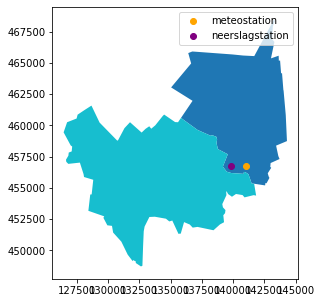

In [21]:
fig, ax = plt.subplots(figsize=(5,5))
# plot locaties meetstations
ax.plot(precip1.x, precip1.y, marker='o', color='orange', label='meteostation', ls="none")
ax.plot(precip2.x, precip2.y, marker='o', color='purple', label='neerslagstation', ls='none')

# voeg gemeentegrenzen toe
geodata_url = 'https://geodata.nationaalgeoregister.nl/cbsgebiedsindelingen/wfs?request=GetFeature&service=WFS&version=2.0.0&typeName=cbs_gemeente_2017_gegeneraliseerd&outputFormat=json'
gemeentegrenzen = gpd.read_file(geodata_url)
gemeentegrenzen.loc[gemeentegrenzen.statnaam.isin(['De Bilt', 'Utrecht'])].plot('statnaam',aspect=1, ax=ax, legend=True)
ax.legend();

# Verschillende Types Referentieverdamping

Het KNMI levert één type referentieverdamping namelijk Makkink referentieverdamping, variabele EV24. Hydropandas heeft de mogelijkheid om, vanuit de gegevens van het KNMI, drie types referentieverdamping uit te rekenen:
- Penman
- Hargreaves
- Makkink (op dezelfde manier als het KNMI)

Deze types referentieverdamping worden berekend zoals beschreven in [Allen et al. 1990](https://www.fao.org/3/x0490E/x0490e07.htm#solar%20radiation) en het [STOWA rapport](https://edepot.wur.nl/163482). Let op, in laatsgenoemde staan wel fouten in de eenheden.

Qua variabelen van het KNMI worden de volgende gebruikt van de MeteoStations:
- Makkink: de gemiddelde temperatuur (TG) en inkomende globale straling (Q)
- Penman: de gemiddelde (TG), minimum (TN) en maximum (TX) temperatuur, de globale straling (Q), de windsnelheid (FG) en de luchtvochtigheid (PG).
- Hargreaves: de gemiddelde (TG), minimum (TN) en maximum (TX) temperatuur

In [22]:
ev24 = EvaporationObs.from_knmi(260).squeeze() # et_type='EV24' by default
makk = EvaporationObs.from_knmi(260, et_type='makkink').squeeze()

## Vergelijking Makkink

Laten we eerst Hypdropandas Makkink verdamping vergelijken met de EV24 Makkink verdamping van het KNMI. We zien dat de (als we de Hydropandas verdamping afronden op 4 decimalen)

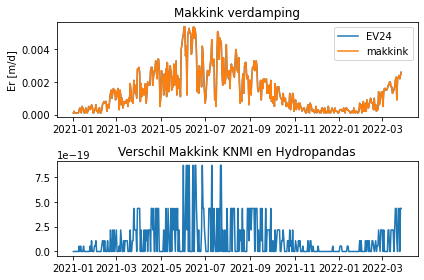

In [23]:
f, ax = plt.subplots(2, figsize=(6,4))
ax[0].plot(ev24, label=ev24.name)
ax[0].plot(makk.round(4), label=makk.name)
ax[0].set_ylabel('Er [m/d]')
ax[0].set_title('Makkink verdamping')
ax[0].legend()
ax[1].plot(ev24-makk.round(4))
ax[1].set_title('Verschil Makkink KNMI en Hydropandas')
f.tight_layout()

In [24]:
penm = EvaporationObs.from_knmi(260, et_type='penman').squeeze()
harg = EvaporationObs.from_knmi(260, et_type='hargreaves').squeeze()

# Vergelijking Penman, Makkink en Hargreaves

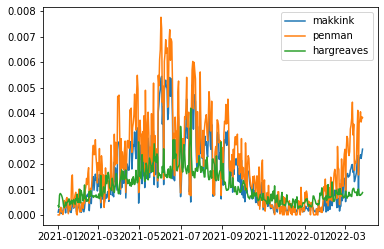

In [25]:
f, ax = plt.subplots(figsize=(6,4))
ax.plot(makk, label=makk.name)
ax.plot(penm, label=penm.name)
ax.plot(harg, label=harg.name)
ax.legend();

Gemiddeld geeft Penman een hogere schatting van de referentieverdamping dan Makkink (~0.55mm). Dit is te verklaren door het meenemen van de windsnelheid in de schatting. Hargreaves is een erg eenvoudige manier van het schatten van de verdamping en maakt alleen gebruik van de temperatuur en de extraterrestrische straling. Deze geeft een onderschatting van de verdamping (~-0.35mm tov Makkink).